# Anomaly Detection of Commits Dataset
- Pre-processing 
- EDA (Exploratory Data Analysis) 
- Visualisation using KMeans
- Model Building: Isolation Forest

## Importing the essential libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
com=pd.read_csv('commits.csv')
com.head()

,cmt_id,repo_id,cmt_commit_hash,cmt_author_name,cmt_author_raw_email,cmt_author_email,cmt_author_date,cmt_author_affiliation,cmt_committer_name,cmt_committer_raw_email,...,cmt_date_attempted,cmt_ght_author_id,cmt_ght_committer_id,cmt_ght_committed_at,tool_source,tool_version,data_source,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
0,34304725,25433,0597b8c0eea09f494d2723c12e0ec4336ff148d4,Sean P. Goggins,s@goggins.com,s@goggins.com,2019-06-22,NaN,GitHub,noreply@github.com,...,2019-06-22 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-06-22 15:37:20+02,2019-06-22 15:37:20+02
1,34304726,25433,689593cfdc260b353fb54b6e4952ac387b75be01,Georg J.P. Link,linkgeorg@gmail.com,linkgeorg@gmail.com,2019-07-29,NaN,GitHub,noreply@github.com,...,2019-07-29 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-07-29 20:49:46+02,2019-07-29 20:49:46+02
2,34304727,25433,a77fb07ec053183bd2d71e6a751e9e53e7a4cd29,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,NaN,GitHub,noreply@github.com,...,2019-08-02 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:29:20+02,2019-08-02 13:29:20+02
3,34304728,25433,1465ca8c219783adcdbd90673a728c9a43c45bea,Matt Snell,msnell@unomaha.edu,msnell@unomaha.edu,2019-03-26,NaN,GitHub,noreply@github.com,...,2019-03-26 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-03-26 11:31:18+02,2019-03-26 11:31:18+02
4,34304729,25433,f2757c9ac4ba2f056fc76d52636c17aa5beba48e,Matt Germonprez,germonprez@gmail.com,germonprez@gmail.com,2019-08-02,NaN,GitHub,noreply@github.com,...,2019-08-02 00:00:00,NaN,NaN,NaN,'FacadeAugur','0.0.1','git_repository',2019-10-19 16:08:53,2019-08-02 13:27:38+02,2019-08-02 13:27:38+02


In [3]:
com.describe()

,cmt_id,repo_id,cmt_author_affiliation,cmt_committer_affiliation,cmt_added,cmt_removed,cmt_whitespace,cmt_ght_author_id,cmt_ght_committer_id,cmt_ght_committed_at
count,2.094600e+04,20946.000000,0.0,0.0,20946.000000,20946.000000,20946.000000,0.0,0.0,0.0
mean,3.431520e+07,25430.252506,NaN,NaN,110.478516,108.184904,10.996945,NaN,NaN,NaN
std,6.046734e+03,0.645216,NaN,NaN,2170.329135,2450.196854,210.401233,NaN,NaN,NaN
min,3.430472e+07,25430.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,3.430996e+07,25430.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN
50%,3.431520e+07,25430.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN
75%,3.432043e+07,25430.000000,NaN,NaN,14.000000,7.000000,2.000000,NaN,NaN,NaN
max,3.432567e+07,25434.000000,NaN,NaN,122933.000000,202084.000000,11071.000000,NaN,NaN,NaN


In [4]:
com.shape

(20946, 27)

The data contains:
- No. of rows = 20946
- No. of columns = 27

# Data Pre-processing

## To check the missing values

In [5]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cmt_id                      20946 non-null  int64  
 1   repo_id                     20946 non-null  int64  
 2   cmt_commit_hash             20946 non-null  object 
 3   cmt_author_name             20946 non-null  object 
 4   cmt_author_raw_email        20946 non-null  object 
 5   cmt_author_email            20946 non-null  object 
 6   cmt_author_date             20946 non-null  object 
 7   cmt_author_affiliation      0 non-null      float64
 8    cmt_committer_name         20946 non-null  object 
 9   cmt_committer_raw_email     20946 non-null  object 
 10   cmt_committer_email        20946 non-null  object 
 11  cmt_committer_date          20946 non-null  object 
 12  cmt_committer_affiliation   0 non-null      float64
 13  cmt_added                   209

In [6]:
com.columns

Index(['cmt_id ', 'repo_id ', 'cmt_commit_hash ', 'cmt_author_name ',
       'cmt_author_raw_email', 'cmt_author_email ', 'cmt_author_date ',
       'cmt_author_affiliation ', ' cmt_committer_name ',
       'cmt_committer_raw_email ', ' cmt_committer_email ',
       'cmt_committer_date ', 'cmt_committer_affiliation ', 'cmt_added ',
       'cmt_removed ', 'cmt_whitespace', ' cmt_filename ',
       ' cmt_date_attempted ', 'cmt_ght_author_id', 'cmt_ght_committer_id',
       'cmt_ght_committed_at', 'tool_source', 'tool_version', 'data_source',
       ' data_collection_date', 'cmt_author_timestamp ',
       'cmt_committer_timestamp'],
      dtype='object')

## Selection of salient features

In [7]:
ann=com[['cmt_author_name ','repo_id ','cmt_added ','cmt_removed ','cmt_whitespace']]
ann

,cmt_author_name,repo_id,cmt_added,cmt_removed,cmt_whitespace
0,Sean P. Goggins,25433,0,0,0
1,Georg J.P. Link,25433,10,3,0
2,Matt Germonprez,25433,12,14,2
3,Matt Snell,25433,17,1,4
4,Matt Germonprez,25433,17,19,2
...,...,...,...,...,...
20941,Sean P. Goggins,25432,0,0,0
20942,Aniruddha Karajgi,25432,534,1,0
20943,Valerio Cosentino,25431,1,1,0
20944,Valerio Cosentino,25431,8,0,4


## Checking and Removing the Outliers

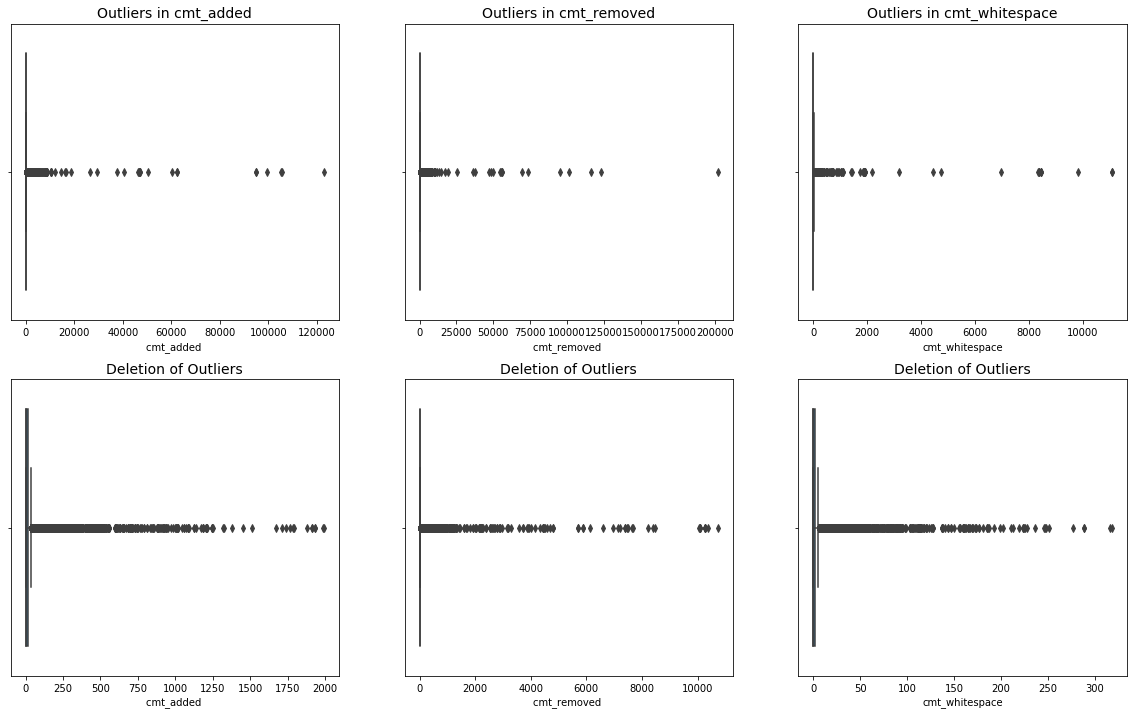

In [8]:

g,axes = plt.subplots (2,3, figsize=(20,12))

fig1=sns.boxplot(ann['cmt_added '],ax=axes[0,0])
fig2=sns.boxplot(ann['cmt_removed '],ax=axes[0,1])
fig3=sns.boxplot(ann['cmt_whitespace'],ax=axes[0,2])

ann2=ann.copy()

ann2=ann2[ann2['cmt_whitespace']<350]
ann2=ann2[ann2['cmt_removed ']<12500]
ann2=ann2[ann2['cmt_added ']<2000]

fig4=sns.boxplot(ann2['cmt_added '],ax=axes[1,0])
fig5=sns.boxplot(ann2['cmt_removed '],ax=axes[1,1])
fig6=sns.boxplot(ann2['cmt_whitespace'],ax=axes[1,2])

axes[0,0].set_title('Outliers in cmt_added',fontsize=14)
axes[0,1].set_title('Outliers in cmt_removed',fontsize=14)
axes[0,2].set_title('Outliers in cmt_whitespace',fontsize=14)
axes[1,0].set_title('Deletion of Outliers',fontsize=14)
axes[1,1].set_title('Deletion of Outliers',fontsize=14)
axes[1,2].set_title('Deletion of Outliers',fontsize=14)

plt.show()

# Exploratory Data Analysis

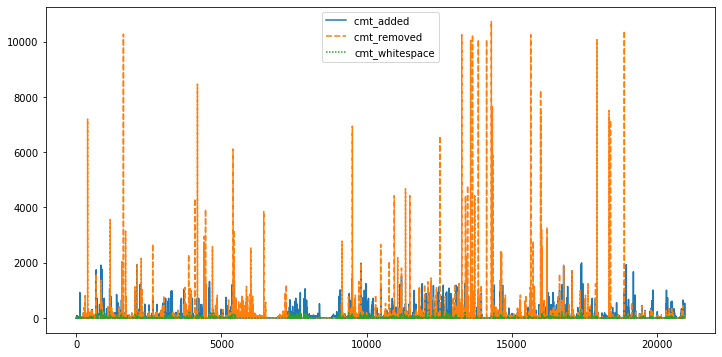

In [9]:
#LINEPLOT
plt.figure(figsize=(12,6))
sns.lineplot(data=ann2.iloc[:,[2,3,4]])
plt.show()

The above graph shows the addition, deletion and the whitespace of commit dataset.

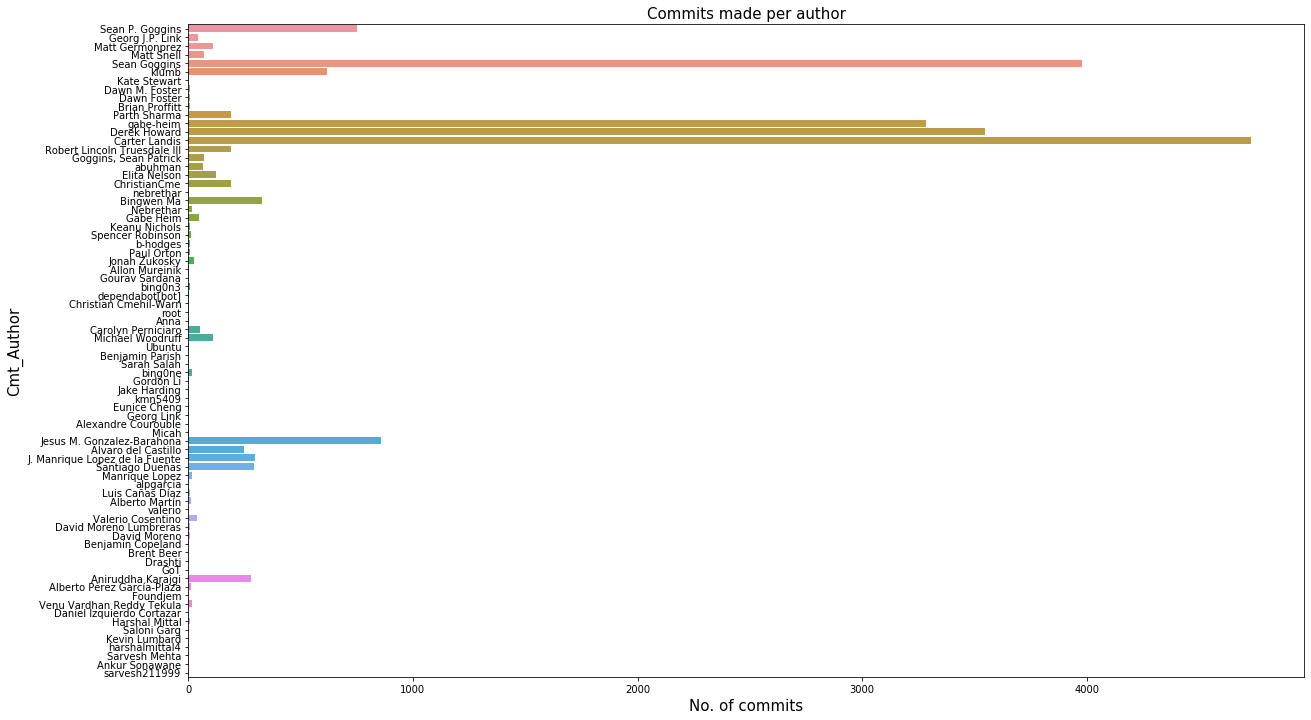

In [10]:
z=ann2['cmt_author_name '].value_counts()
z1=z.to_dict()
ann2['count']=ann2['cmt_author_name '].map(z1)
# Made new column for the count.
plt.figure(figsize=(20,12))
sns.barplot(x=ann2['count'],y=ann2['cmt_author_name '])
plt.title('Commits made per author', fontsize=15)
plt.xlabel('No. of commits',fontsize=15)
plt.ylabel('Cmt_Author',fontsize=15)
plt.show()

- This barplot represents the relationship between the Commit-Author and the No. of commits made by each author.
- Since the no. of commits below 100 are very less. So we need to remove them for better analysis.

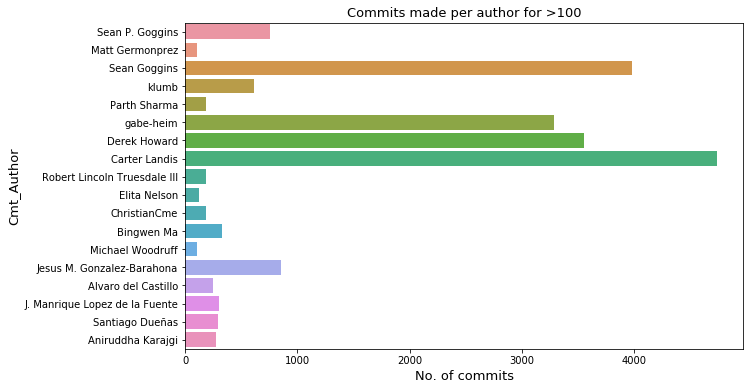

In [11]:
# REMOVING THOSE COMMITS WHICH HAS NUMBER LESS THAN 100
ann2=ann2[ann2['count']>100]
plt.figure(figsize=(10,6))
sns.barplot(x=ann2['count'],y=ann2['cmt_author_name '])
plt.title('Commits made per author for >100', fontsize=13)
plt.xlabel('No. of commits',fontsize=13)
plt.ylabel('Cmt_Author',fontsize=13)
plt.show()

In [12]:
ann2['repo_id '].value_counts()

25430    17107
25431     1426
25432     1386
25433      185
25434       19
Name: repo_id , dtype: int64

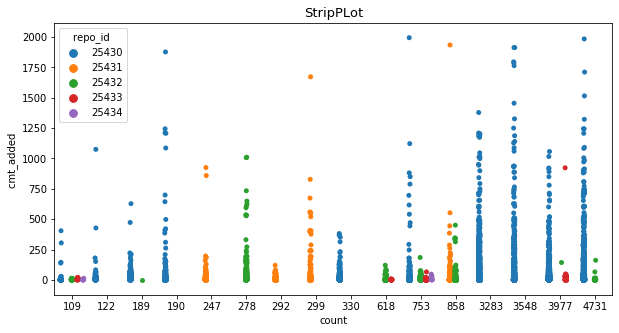

In [13]:
plt.figure(figsize=(10,5))
sns.stripplot(y="cmt_added ", x="count", data=ann2,hue="repo_id ", dodge=1)
plt.title('StripPLot',fontsize=13)
plt.show()

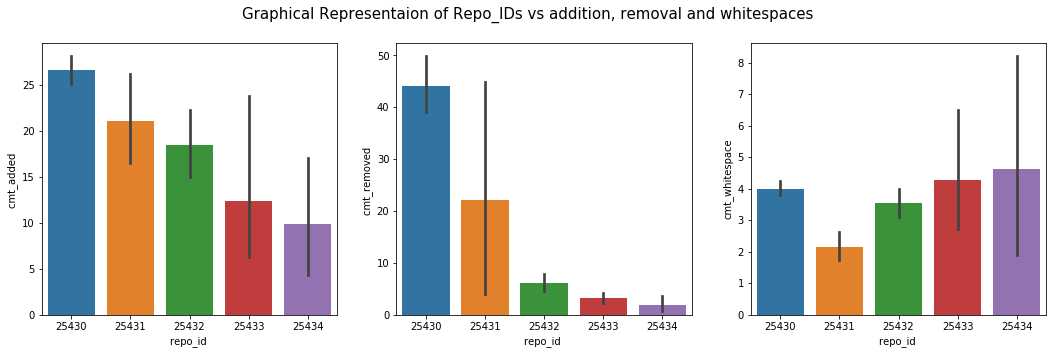

In [24]:
#BarPLot
s,axes=plt.subplots(1,3,figsize=(18,5))
f1=sns.barplot(x=ann2['repo_id '],y=ann2['cmt_added '],ax=axes[0])
f2=sns.barplot(x=ann2['repo_id '],y=ann2['cmt_removed '],ax=axes[1])
f3=sns.barplot(x=ann2['repo_id '],y=ann2['cmt_whitespace'],ax=axes[2])
s.suptitle('Graphical Representaion of Repo_IDs vs addition, removal and whitespaces',fontsize=15)
plt.show()

# Visualisation using KMeans clustering

In [25]:
ann2.head()

,cmt_author_name,repo_id,cmt_added,cmt_removed,cmt_whitespace,count
0,Sean P. Goggins,25433,0,0,0,753
2,Matt Germonprez,25433,12,14,2,109
4,Matt Germonprez,25433,17,19,2,109
6,Sean P. Goggins,25433,0,0,0,753
7,Sean P. Goggins,25433,0,0,0,753


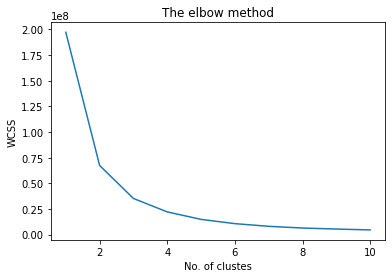

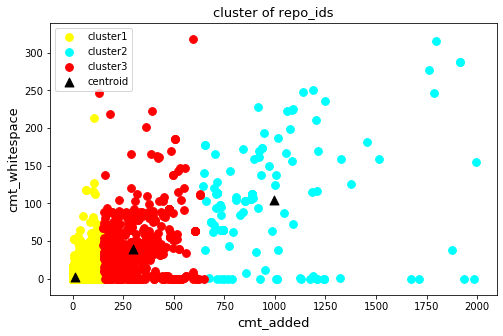

In [59]:
# CMT_ADDED
X=ann2.iloc[:,[2,4]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
   
plt.plot(range(1,11,1),wcss)
plt.title('The elbow method')
plt.xlabel('No. of clustes')
plt.ylabel('WCSS')
plt.show()

kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=100)
y_means=kmeans.fit_predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=60,color='yellow',label='cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=60,color='cyan',label='cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=60,color='red',label='cluster3')
#plt.scatter(X[y_means==3,0],X[y_means==3,1],s=80,color='cyan',label='cluster4')
#plt.scatter(X[y_means==4,0],X[y_means==4,1],s=80,color='yellow',label='cluster5')
#plt.scatter(X[y_means==5,0],X[y_means==5,1],s=80,color='magenta',label='cluster6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,color='black',marker='^',label='centroid')
plt.title('cluster of repo_ids',fontsize=13)
plt.xlabel('cmt_added',fontsize=13)
plt.ylabel('cmt_whitespace',fontsize=13)
plt.legend()
plt.show()

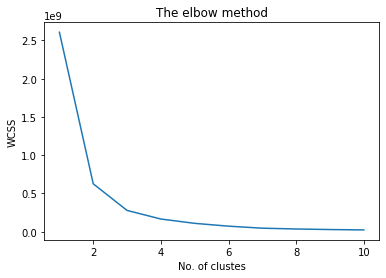

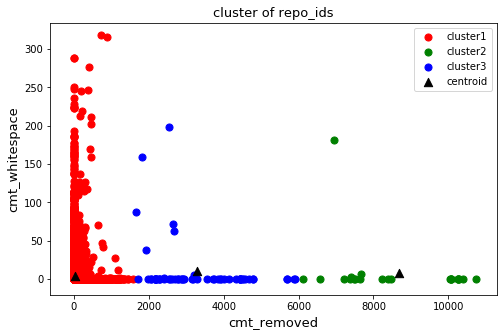

In [58]:
# CMT_REMOVED
R=ann2.iloc[:,[3,4]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=100)
    kmeans.fit(R)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11,1),wcss)
plt.title('The elbow method')
plt.xlabel('No. of clustes')
plt.ylabel('WCSS')
plt.show()

kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=100)
y_means=kmeans.fit_predict(R)

plt.figure(figsize=(8,5))
plt.scatter(R[y_means==0,0],R[y_means==0,1],s=50,color='red',label='cluster1')
plt.scatter(R[y_means==1,0],R[y_means==1,1],s=50,color='green',label='cluster2')
plt.scatter(R[y_means==2,0],R[y_means==2,1],s=50,color='blue',label='cluster3')
#plt.scatter(X[y_means==3,0],X[y_means==3,1],s=80,color='cyan',label='cluster4')
#plt.scatter(X[y_means==4,0],X[y_means==4,1],s=80,color='yellow',label='cluster5')
#plt.scatter(X[y_means==5,0],X[y_means==5,1],s=80,color='magenta',label='cluster6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70,color='black',marker='^',label='centroid')
plt.title('cluster of repo_ids',fontsize=13)
plt.xlabel('cmt_removed',fontsize=13)
plt.ylabel('cmt_whitespace',fontsize=13)
plt.legend()
plt.show()

# Model Building: Isolation Forest

## Feature Scaling

In [28]:
fea=ann2.iloc[:,1:]

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ann_sc=sc.fit_transform(fea)
print(ann_sc)

[[ 4.43879526 -0.26098287 -0.10999261 -0.26098051 -1.56772634]
 [ 4.43879526 -0.13842737 -0.07106751 -0.12537025 -1.98519276]
 [ 4.43879526 -0.08736258 -0.05716569 -0.12537025 -1.98519276]
 ...
 [ 2.83055117 -0.25076991  0.0762918  -0.26098051 -1.87564023]
 [ 2.83055117 -0.26098287 -0.10999261 -0.26098051 -1.56772634]
 [ 2.83055117  5.19273657 -0.10721225 -0.26098051 -1.87564023]]


## Implementation of Isolation Forest using Scikit

In [30]:
from sklearn.ensemble import IsolationForest
isofor=IsolationForest(contamination=0.01,random_state=0)
isofor.fit(ann_sc)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [31]:
pred=isofor.predict(ann_sc)
ann2['anomaly']=pred
ann2['anomaly'].value_counts()

 1    19921
-1      202
Name: anomaly, dtype: int64

In [32]:
outliers = ann2.loc[ann2['anomaly'] == -1]
outlier_index = list(outliers.index)

inliers=ann2.loc[ann2['anomaly']==1]
inlier_index=list(inliers.index)

outliers.head()

,cmt_author_name,repo_id,cmt_added,cmt_removed,cmt_whitespace,count,anomaly
130,Sean Goggins,25433,923,1,170,3977,-1
706,Carter Landis,25430,477,1,92,4731,-1
713,Carter Landis,25430,606,1,63,4731,-1
730,Carter Landis,25430,713,1,114,4731,-1
858,Derek Howard,25430,1913,1,288,3548,-1


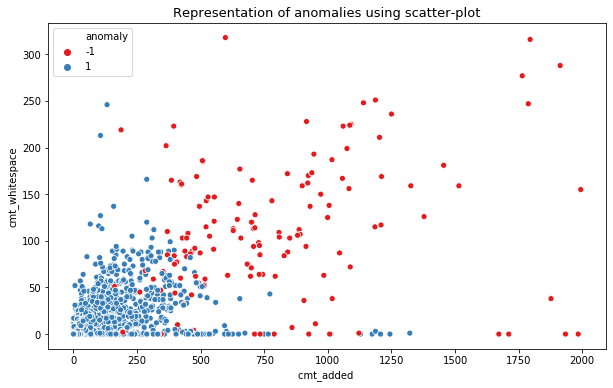

In [49]:
#SCATTER-PLOT
plt.figure(figsize=(10,6))
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=ann2['cmt_added '],y=ann2['cmt_whitespace'],hue=ann2['anomaly'],palette='Set1')
plt.title('Representation of anomalies using scatter-plot',fontsize=13)
plt.show()

Here, -1 represents anomaly and 1 represents non-anomalous value.

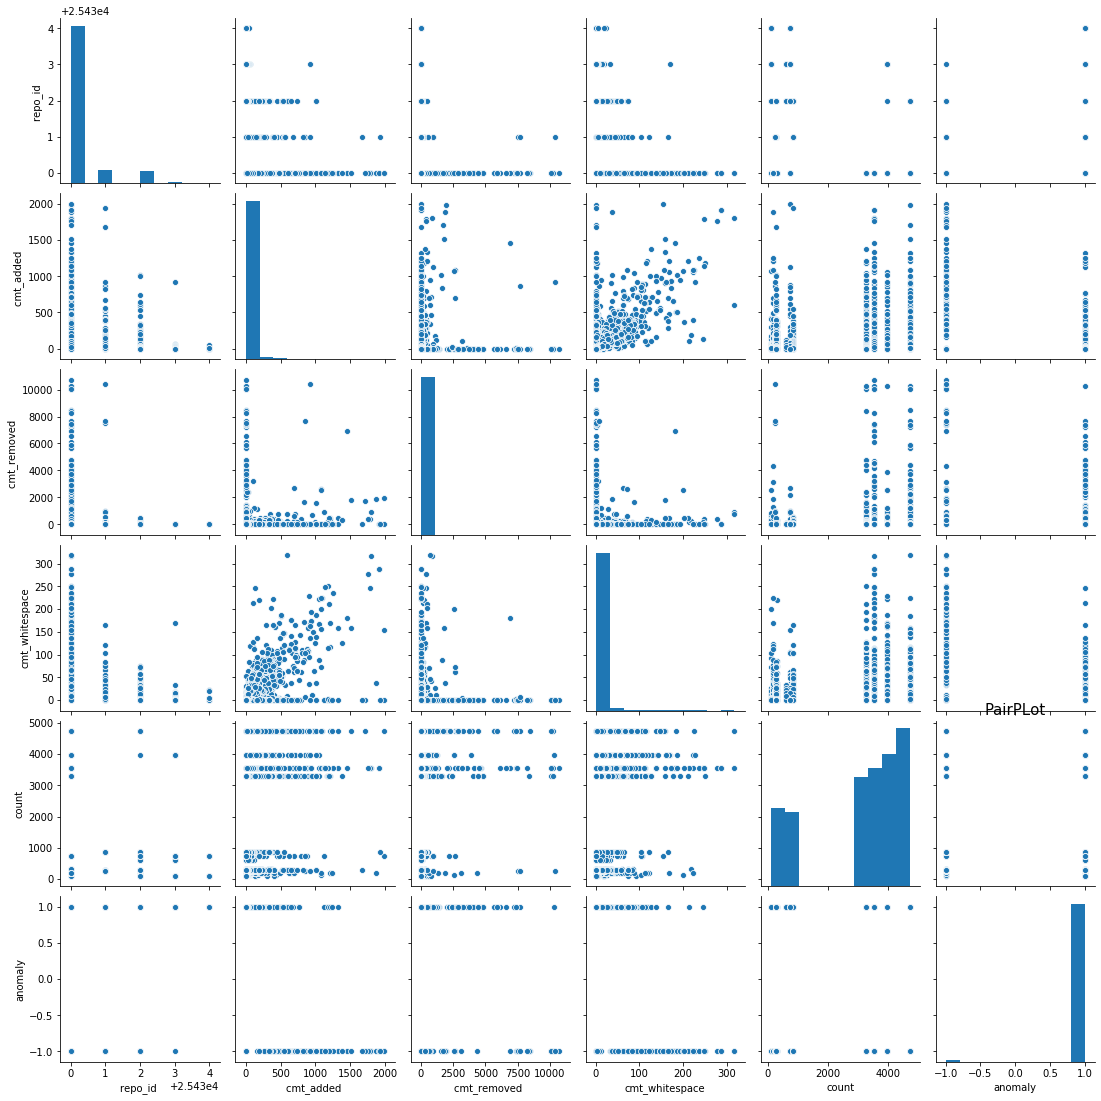

In [54]:
sns.pairplot(ann2)
plt.title('PairPLot',fontsize=15)
plt.show()

## 3D Visualisation of Anomalies in commits dataset

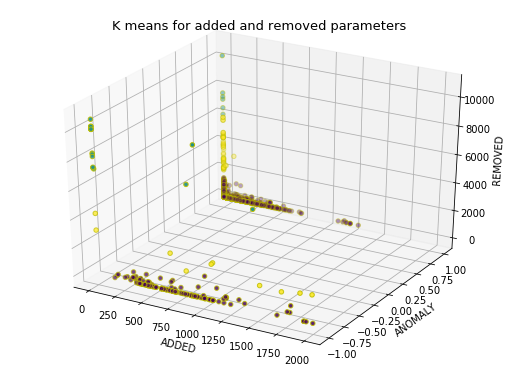

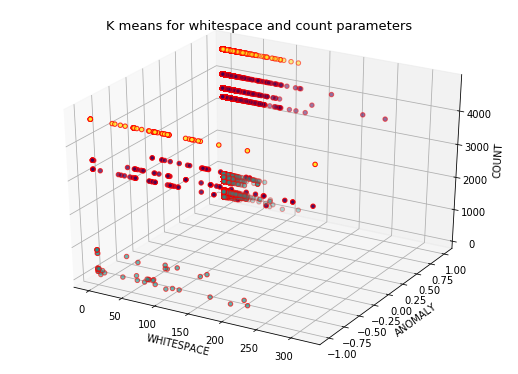

In [51]:
from mpl_toolkits.mplot3d import Axes3D
Z=ann2.iloc[:,[2,3,6]]
km = KMeans(n_clusters=3)
km.fit(Z)
km.predict(Z)
labels = km.labels_
#Plotting
#f,axes=plt.subplots(figsize=(20,10))
fig = plt.figure(1, figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(Z.iloc[:,0], Z.iloc[:,2], Z.iloc[:,1],c=labels.astype(np.float),edgecolor="y")
ax.set_ylabel("ANOMALY")
ax.set_xlabel("ADDED")
ax.set_zlabel("REMOVED")
plt.title("K means for added and removed parameters", fontsize=13);
plt.show()

Q=ann2.iloc[:,[4,5,6]]
km = KMeans(n_clusters=3)
km.fit(Q)
km.predict(Q)
labels = km.labels_
#Plotting
fig2 = plt.figure(1, figsize=(7,5))
ax2 = Axes3D(fig2)
ax2.scatter(Q.iloc[:,0], Q.iloc[:,2], Q.iloc[:,1],c=labels.astype(np.float),edgecolor="r")
ax2.set_ylabel("ANOMALY")
ax2.set_xlabel("WHITESPACE")
ax2.set_zlabel("COUNT")
plt.title("K means for whitespace and count parameters", fontsize=13);
plt.show()


## Heatmap of a Correlation matrix

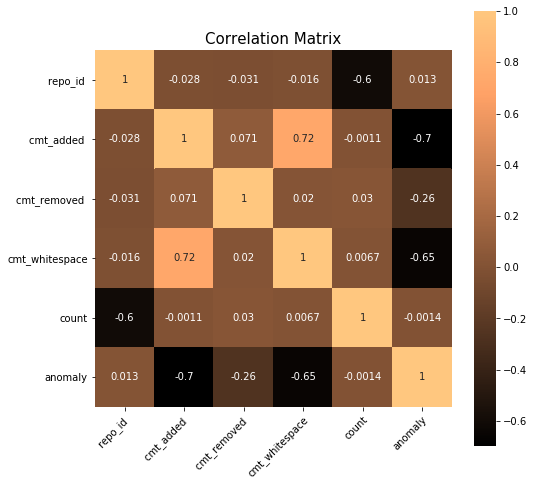

In [55]:
fig,ax=plt.subplots(figsize=(8,8))
aa=ann2.iloc[:,1:]
im=ax.imshow(aa)
sns.heatmap(aa.corr(),cmap="copper",annot=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.title('Correlation Matrix',fontsize=15)
plt.show()

A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. The stronger the color, the larger the correlation magnitude. 

<hr>